# Predict Player Performance - NHL

Naive approach of
calculation of player improvement: 
1. A player starts his first NHL season with 0 improvement as there is no prior NHL experience to deduce improvement.
2. Each year that a player plays in will be evaluated by their performance.
3. A players future improvement will then be deduced by consecutive year's performances.
4. A player's performance would depend on points, goals, assists, plus and minus and more. (Needs to be explored)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data exploring and preparation

#### Data set found on Kaggle, search NHL player data for Hart trophy prediction (https://www.kaggle.com/xavya77/nhl04to18)

In [491]:
player_data = pd.read_csv('NHL_2004_2018_Player_Data.csv', encoding='latin-1')

In [492]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13186 entries, 0 to 13185
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rk          13186 non-null  int64  
 1   Player      13186 non-null  object 
 2   Age         13186 non-null  int64  
 3   Pos         13186 non-null  object 
 4   Tm          13186 non-null  object 
 5   GP          13186 non-null  int64  
 6   G           13186 non-null  int64  
 7   A           13186 non-null  int64  
 8   PTS         13186 non-null  int64  
 9   plusminus   13186 non-null  int64  
 10  PIM         13186 non-null  int64  
 11  PS          13186 non-null  float64
 12  EV          13186 non-null  int64  
 13  PP          13186 non-null  int64  
 14  SH          13186 non-null  int64  
 15  GW          13186 non-null  int64  
 16  EV.1        13186 non-null  int64  
 17  PP.1        13186 non-null  int64  
 18  SH.1        13186 non-null  int64  
 19  S           13186 non-nul

In [493]:
player_data.describe()

,Rk,Age,GP,G,A,PTS,plusminus,PIM,PS,EV,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
count,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,13186.000000,...,13186.000000,13186.000000,13185.000000,13186.000000,13185.000000,13185.000000,12875.000000,13186.000000,13186.000000,13186.000000
mean,616.899060,26.663583,49.076900,7.534355,12.890869,20.425224,-0.354467,32.445321,2.489170,5.394206,...,807.237297,14.217051,27.527797,44.194676,58.252939,58.252029,20.191231,0.001062,3.101244,2011.279918
std,541.522478,4.584782,28.703445,8.916717,13.256153,20.969354,9.465532,32.440642,2.825204,6.135389,...,578.237459,5.006593,38.390309,53.808131,155.768337,148.060616,25.786119,0.032568,52.118755,4.077481
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-46.000000,0.000000,-1.900000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,254.000000,23.000000,21.000000,1.000000,2.000000,3.000000,-5.000000,8.000000,0.200000,1.000000,...,235.000000,10.933333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000
50%,508.000000,26.000000,57.000000,4.000000,9.000000,14.000000,-1.000000,24.000000,1.600000,3.000000,...,817.500000,14.575000,12.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
75%,761.000000,30.000000,76.000000,12.000000,20.000000,32.000000,4.000000,46.000000,4.100000,8.000000,...,1287.000000,18.000000,38.000000,71.000000,11.000000,15.000000,45.200000,0.000000,0.000000,2015.000000
max,2644.000000,48.000000,84.000000,65.000000,96.000000,125.000000,50.000000,324.000000,17.200000,48.000000,...,2412.000000,26.800000,283.000000,382.000000,1273.000000,941.000000,100.000000,1.000000,1604.000000,2018.000000


In [494]:
player_data.head()

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,TOI,ATOI,BLK,HIT,FOW,FOL,FO_percent,HART,Votes,Season
0,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,...,1733,21.133333,29.0,34,348.0,458.0,43.2,1,1604,2017
1,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,...,1491,19.883333,27.0,80,842.0,906.0,48.2,0,1104,2017
2,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,...,1754,21.400000,15.0,28,7.0,44.0,13.7,0,206,2017
3,4,Nicklas Backstrom\backsni02,29,C,WSH,82,23,63,86,17,...,1497,18.266667,33.0,45,685.0,648.0,51.4,0,60,2017
4,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,...,1438,19.433333,20.0,30,0.0,0.0,0.0,0,119,2017


In [495]:
# Remove the extra name information
player_data['Player'] = player_data['Player'].str.split('\\').str[0]
# Remove 2013 season since it was a shortened season and may of affected player performance unusually
#player_data = player_data[player_data['Season']!=2013]
# Remove columns that dont affect player perfomance
player_data.drop(['HART', 'Votes', 'BLK', 'HIT', 'FOW', 'FOL', 'FO_percent'], axis=1, inplace=True)

In [496]:
player_data.head()

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,SH,GW,EV.1,PP.1,SH.1,S,S_percent,TOI,ATOI,Season
0,1,Connor McDavid,20,C,EDM,82,30,70,100,27,...,1,6,45,24,1,251,12.0,1733,21.133333,2017
1,2,Sidney Crosby,29,C,PIT,75,44,45,89,17,...,0,5,34,11,0,255,17.3,1491,19.883333,2017
2,3,Patrick Kane,28,RW,CHI,82,34,55,89,11,...,0,5,39,16,0,292,11.6,1754,21.400000,2017
3,4,Nicklas Backstrom,29,C,WSH,82,23,63,86,17,...,0,5,36,27,0,162,14.2,1497,18.266667,2017
4,5,Nikita Kucherov,23,RW,TBL,74,40,45,85,13,...,0,7,30,15,0,246,16.3,1438,19.433333,2017


In [497]:
#Sort data frame based off of name and season 2004-2018
player_data = player_data.sort_values(['Player', 'Season']).reset_index(drop=True)

In [835]:
print(player_data.shape)

(5561, 25)


In [499]:
# Drop players with 2 or less NHL seasons
player_data.groupby('Player').count()
for n in player_data.groupby('Player').count().index:
    if player_data.groupby('Player').count().loc[n][-1]<=2:
        player_data.drop(player_data[player_data['Player'] == n].index, axis=0, inplace=True)

In [500]:
print(player_data.shape)
player_data = player_data.reset_index(drop=True)
player_data.head(10)

(11791, 24)


,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,SH,GW,EV.1,PP.1,SH.1,S,S_percent,TOI,ATOI,Season
0,2430,Aaron Downey,29,RW,DAL,37,1,1,2,2,...,0,1,1,0,0,11,9.1,167,4.500000,2004
1,1435,Aaron Downey,31,RW,TOT,42,3,4,7,2,...,0,0,4,0,0,21,14.3,235,5.600000,2006
2,708,Aaron Downey,32,RW,MTL,21,1,0,1,-6,...,0,1,0,0,0,10,10.0,105,4.983333,2007
3,667,Aaron Downey,33,RW,DET,56,0,3,3,0,...,0,0,3,0,0,15,0.0,257,4.583333,2008
4,695,Aaron Downey,34,RW,DET,4,1,1,2,0,...,0,0,1,0,0,2,50.0,21,5.216667,2009
5,708,Aaron Downey,32,RW,MTL,21,1,0,1,-6,...,0,1,0,0,0,10,10.0,105,4.983333,2009
6,161,Aaron Ekblad,18,D,FLA,81,12,27,39,12,...,0,4,20,7,0,170,7.1,1767,21.816667,2015
7,195,Aaron Ekblad,19,D,FLA,78,15,21,36,18,...,0,4,15,6,0,182,8.2,1691,21.683333,2016
8,333,Aaron Ekblad,20,D,FLA,68,10,11,21,-23,...,1,2,7,4,0,225,4.4,1459,21.466667,2017
9,183,Aaron Ekblad,21,D,FLA,82,16,22,38,9,...,0,4,16,6,0,189,8.5,1918,23.400000,2018


In [501]:
# Function to return duplicate of list
from collections import Counter
def duplicates(list_of_numbers):
    counter = Counter(list_of_numbers)
    num=0
    for y in counter:
        if counter[y] > 1:
            num=y
    return num

In [502]:
#df = df[df.line_race != 0]
# This player's stats are not represented correctly
player_data = player_data[player_data['Player']!='Alexandre Picard']

In [503]:
# From above data cleaning found that player Petr Sykora had more than 1 duplicate seasons so manually deleted duplicates
player_data[player_data['Player']=='Petr Sykora']
player_data.drop([9059, 9063], axis=0, inplace=True)

In [504]:
#Drop repeating years within a player's career only retaining their best performance
for name in player_data.groupby('Player').count().index:
    year= duplicates(player_data[player_data['Player']==name]['Season'].values)
    if year !=0:
        ind = player_data[(player_data['Player']==name) & (player_data['Season']==year)].index[1]
        player_data = player_data.drop(ind, axis=0)    

In [505]:
# Check to make sure no more duplicates
for name in player_data.groupby('Player').count().index:
    year= duplicates(player_data[player_data['Player']==name]['Season'].values)
    if year !=0: 
        print(name)

In [506]:
# Fix rankings for years 2004 and 2006
for year in [2004,2006]:
    i=1
    for rk in sorted(player_data[(player_data['Season']==year)]['Rk'].unique()):
        ind = player_data[(player_data['Season']==year)&(player_data['Rk']==rk)].index[0]
        player_data.loc[ind, 'Rk'] = i
        i+=1

In [507]:
# Drop players who did not at least play a 3rd of the NHL season
player_data = player_data[player_data['GP']>=27]

In [508]:
# Drop defenceman as there arent any real stats that can quantify a defencemans success. A defenceman that scores a lot might
# be a liability to a team
player_data = player_data[player_data['Pos']!='D']

In [509]:
player_data.reset_index(drop=True)

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,SH,GW,EV.1,PP.1,SH.1,S,S_percent,TOI,ATOI,Season
0,499,Aaron Downey,29,RW,DAL,37,1,1,2,2,...,0,1,1,0,0,11,9.1,167,4.500000,2004
1,520,Aaron Downey,31,RW,TOT,42,3,4,7,2,...,0,0,4,0,0,21,14.3,235,5.600000,2006
2,667,Aaron Downey,33,RW,DET,56,0,3,3,0,...,0,0,3,0,0,15,0.0,257,4.583333,2008
3,626,Aaron Palushaj,22,RW,MTL,38,1,4,5,1,...,0,0,4,0,0,37,2.7,288,7.566667,2012
4,646,Aaron Volpatti,27,RW,TOT,33,1,1,2,-2,...,0,0,1,0,0,21,4.8,275,8.333333,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5556,618,Zenon Konopka,29,C,TBL,74,2,3,5,-11,...,0,1,2,1,0,41,4.9,602,8.133333,2010
5557,536,Zenon Konopka,30,C,NYI,82,2,7,9,-14,...,0,0,7,0,0,56,3.6,836,10.183333,2011
5558,606,Zenon Konopka,31,C,OTT,55,3,2,5,-4,...,0,1,2,0,0,34,8.8,431,7.850000,2012
5559,778,Zenon Konopka,32,C,MIN,37,0,0,0,-4,...,0,0,0,0,0,18,0.0,312,8.433333,2013


#### Calculate player improvement and append to existing main data frame

In [680]:
# Function to calculate next year's player improvement over consectutive years
def perf(nxt_goals, nxt_ast, nxt_pm, nxt_toi, nxt_gp, goals, ast, pm, toi, gp):
    return (nxt_goals + 0.5*nxt_ast + nxt_pm/nxt_toi)/(nxt_gp) - (goals + 0.5*ast + pm/toi)/gp

In [687]:
Performance = []
for name in player_data.groupby('Player').count().index:
    years = player_data[player_data['Player']==name]['Season'].unique()
    for i in range(0,len(years)):
        if years[i] == years[-1]:
            Performance.append(0)
        else:
            goals = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i])]['G'])
            ass = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i])]['A'])
            pm = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i])]['plusminus'])
            gp = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i])]['GP'])
            toi = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i])]['TOI'])
            
            nxt_goals = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i+1])]['G'])
            nxt_ass = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i+1])]['A'])
            nxt_pm = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i+1])]['plusminus'])
            nxt_gp = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i+1])]['GP'])
            nxt_toi = int(player_data[(player_data['Player']==name) & (player_data['Season']==years[i+1])]['TOI'])
            
            Performance.append(perf(nxt_goals, nxt_ass, nxt_pm, nxt_toi, nxt_gp, goals, ass, pm, toi, gp))

In [688]:
print(player_data.shape)
print(len(Performance))

(5561, 25)
5561


In [689]:
player_data['Performance'] = pd.Series(Performance).values

In [697]:
pplayer_data = player_data[player_data['Performance']!=0] #Drop current year data as we cant predict future improvement yet

In [698]:
pplayer_data = pplayer_data.reset_index(drop=True)

In [699]:
pplayer_data.describe()

,Rk,Age,GP,G,A,PTS,plusminus,PIM,PS,EV,...,GW,EV.1,PP.1,SH.1,S,S_percent,TOI,ATOI,Season,Performance
count,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,...,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000,4506.000000
mean,247.465379,26.968708,67.161562,14.453839,20.138482,34.592321,0.147137,44.221482,3.541589,10.409010,...,2.301154,14.243453,5.539281,0.355748,131.210386,10.519729,1044.319574,15.223898,2010.897692,-0.006822
std,176.956884,4.417064,15.281091,9.562655,13.679343,21.720483,10.940252,34.993416,2.958302,6.324436,...,2.116283,8.377205,6.465645,0.730915,67.295239,3.932237,379.490415,3.621475,3.787175,0.123528
min,1.000000,18.000000,27.000000,0.000000,0.000000,0.000000,-46.000000,0.000000,-1.900000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,91.000000,0.116667,2004.000000,-0.458347
25%,96.000000,24.000000,57.000000,7.000000,10.000000,17.000000,-7.000000,21.000000,1.100000,6.000000,...,1.000000,8.000000,0.000000,0.000000,81.000000,7.900000,755.000000,12.850000,2008.000000,-0.086236
50%,217.000000,26.000000,73.000000,13.000000,18.000000,31.000000,-1.000000,34.000000,3.000000,9.000000,...,2.000000,13.000000,3.000000,0.000000,122.000000,10.500000,1076.500000,15.650000,2011.000000,-0.011967
75%,374.000000,30.000000,80.000000,20.000000,28.000000,49.000000,6.000000,56.000000,5.400000,14.000000,...,3.000000,19.000000,9.000000,0.000000,173.000000,13.000000,1349.750000,18.050000,2014.000000,0.064238
max,810.000000,43.000000,84.000000,65.000000,96.000000,125.000000,47.000000,324.000000,17.200000,48.000000,...,12.000000,60.000000,48.000000,8.000000,528.000000,26.700000,1991.000000,23.683333,2017.000000,0.624881


## Explore the data

(array([6.000e+00, 9.700e+01, 5.300e+02, 1.398e+03, 2.583e+03, 6.700e+02,
        2.160e+02, 4.900e+01, 1.000e+01, 2.000e+00]),
 array([-0.4583468 , -0.35002398, -0.24170116, -0.13337834, -0.02505552,
         0.0832673 ,  0.19159012,  0.29991293,  0.40823575,  0.51655857,
         0.62488139]),
 <a list of 10 Patch objects>)

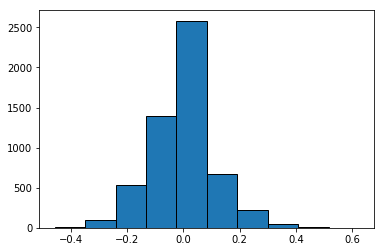

In [837]:
plt.hist(player_data['Performance'], edgecolor='black')
#plt.xticks([-.002, 0.4, 0.75, 1.196])

In [869]:
Ages=[]
perf=[]
for name in player_data.groupby('Player').count().index:
    Ages.append(player_data[player_data['Player']==name]['Age'].values)
    perf.append(player_data[player_data['Player']==name]['Performance'].values)
    

In [870]:
Agesl = [item for sublist in Ages for item in sublist]
perfl = [item for sublist in perf for item in sublist]

C:\Users\Krishant\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.YTick at 0x1d8b123ceb8>,
 <a list of 7 Text yticklabel objects>)

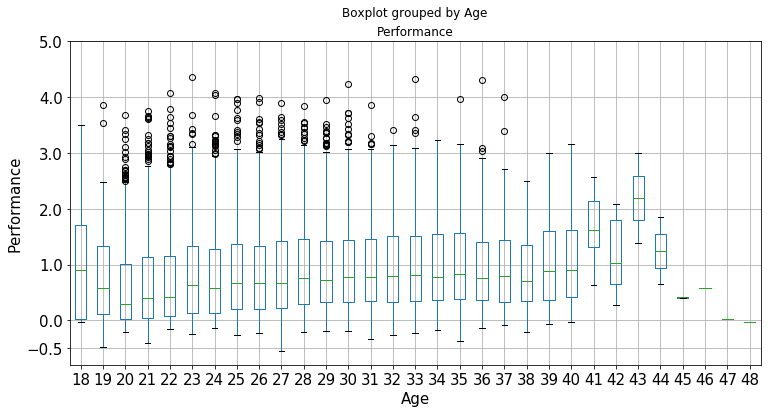

In [871]:
boxplot = player_data.boxplot('Performance', 'Age', figsize=(12,6), fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.yticks([-0.5, 0, 1, 2, 3, 4,5])

In [694]:
pplayer_data[pplayer_data['Player']=='Evgeni Malkin']

,Rk,Player,Age,Pos,Tm,GP,G,A,PTS,plusminus,...,GW,EV.1,PP.1,SH.1,S,S_percent,TOI,ATOI,Season,Performance
1761,18,Evgeni Malkin,20,LW,PIT,78,33,52,85,2,...,6,28,24,0,242,13.6,1494,19.166667,2007,0.176611
1762,2,Evgeni Malkin,21,C,PIT,82,47,59,106,16,...,5,36,23,0,272,17.3,1748,21.316667,2008,-0.030487
1763,1,Evgeni Malkin,22,C,PIT,82,35,78,113,17,...,4,51,27,0,290,12.1,1846,22.516667,2009,-0.119033
1764,19,Evgeni Malkin,23,C,PIT,67,28,49,77,-6,...,7,33,15,1,268,10.4,1397,20.850000,2010,-0.178976
1765,194,Evgeni Malkin,24,C,PIT,43,15,22,37,-4,...,3,13,9,0,182,8.2,852,19.816667,2011,0.455610
1766,1,Evgeni Malkin,25,C,PIT,75,50,59,109,18,...,9,37,22,0,339,14.7,1577,21.016667,2012,-0.382469
1767,64,Evgeni Malkin,26,C,PIT,31,9,24,33,5,...,3,10,14,0,99,9.1,611,19.700000,2013,0.114122
1768,15,Evgeni Malkin,27,C,PIT,60,23,49,72,10,...,3,26,23,0,191,12.0,1204,20.066667,2014,-0.081682
1769,18,Evgeni Malkin,28,C,PIT,69,28,42,70,-2,...,4,25,17,0,212,13.2,1309,18.966667,2015,0.035507
1770,55,Evgeni Malkin,29,C,PIT,57,27,31,58,1,...,6,15,16,0,162,16.7,1104,19.366667,2016,0.101396


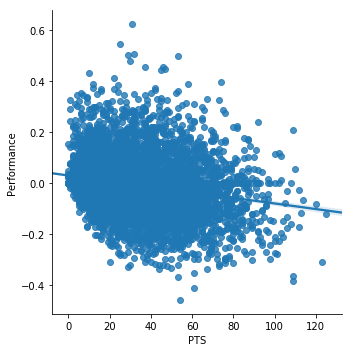

In [695]:
sns.lmplot(data=pplayer_data, x='PTS', y='Performance')

In [696]:
corr_matrix = pplayer_data.corr()
corr_matrix['Performance'].sort_values(ascending=False)

Performance    1.000000
Rk             0.189882
Season        -0.026326
PIM           -0.032819
SH.1          -0.041665
GP            -0.053866
SH            -0.067960
TOI           -0.113266
S             -0.116415
ATOI          -0.134239
PP.1          -0.147688
plusminus     -0.149236
GW            -0.152249
Age           -0.172199
EV.1          -0.175581
A             -0.178902
PP            -0.196812
PTS           -0.215365
EV            -0.223025
G             -0.236092
PS            -0.240711
S_percent     -0.286845
Name: Performance, dtype: float64

## Apply Learning Algorithms: Regression First

In [615]:
# Create dataframe with only features that will be used in ML algs
tot = ['G','PTS','EV','S','A','PS','plusminus','Rk', 'Performance','TOI','PP','GW']
X = ['G','PTS','A','PS','plusminus','EV','Rk','TOI','PP','GW']
Y = ['Performance']

In [710]:
# Data frame to standardized data; should be applied since target variable is gaussian (normally distributed)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pplayer_data[tot])
scaled_data = pd.DataFrame(scaled_data, columns=tot)
scaled_data['Season'] = pplayer_data['Season']

In [715]:
# Since target variable is between -1 to 1, one could normalize the data as well. 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(pplayer_data[tot])
scaled_data = pd.DataFrame(scaled_data, columns=tot)
scaled_data['Season'] = pplayer_data['Season']

In [653]:
# x and y datasets for pre-processed data, according to the one chosen
x = np.asanyarray(scaled_data[X])
y = np.asanyarray(scaled_data[Y])

In [581]:
# no pre-processing
x = np.asanyarray(pplayer_data[X])
y = np.asanyarray(pplayer_data[Y])

In [ ]:
# Scaled training and test data. We want to predict future improvement for most recent years
# So train model with previous years and evaluate data with most recent years
# This cell is for pre-processed data
x_train = np.asanyarray(scaled_data[scaled_data['Season']<2015][X])
x_test = np.asanyarray(scaled_data[scaled_data['Season']>=2015][X])
y_train = np.asanyarray(scaled_data[scaled_data['Season']<2015][Y])
y_test = np.asanyarray(scaled_data[scaled_data['Season']>=2015][Y])

In [ ]:
# This train/test data is for unprocessed data
x_train = np.asanyarray(pplayer_data[pplayer_data['Season']<2016][X])
x_test = np.asanyarray(pplayer_data[pplayer_data['Season']>=2016][X])
y_train = np.asanyarray(pplayer_data[pplayer_data['Season']<2016][Y])
y_test = np.asanyarray(pplayer_data[pplayer_data['Season']>=2016][Y])

In [654]:
# randomize training and test data (not applicable?)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [619]:
print('length of train and test sets: ', len(x_train), ' and ', len(x_test))

length of train and test sets:  4170  and  1391


#### Simple linear regression

In [620]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [621]:
print ('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)

Coefficients:  [[ 1.02873121e+10 -1.97832925e+10  1.51935687e+10  6.27946854e-02
  -4.34718132e-02 -2.52434731e-01 -3.44170570e-01 -3.84309769e-01
  -9.45653915e-02  8.54969025e-03]]
Intercept:  [0.36105835]


In [622]:
y_hat= regr.predict(x_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Residual sum of squares: 0.00
Variance score: 0.96


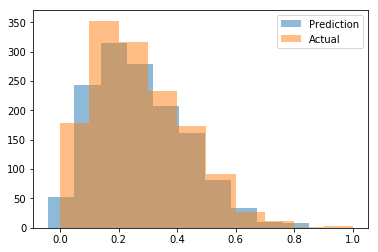

In [623]:
plt.hist(y_hat, alpha=0.5, label='Prediction')
plt.hist(y_test, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.show()

In [592]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha=0.01)
reg.fit(x_train, y_train)

Ridge(alpha=0.01)

In [593]:
print ('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)

Coefficients:  [[ 0.01896738  0.02382853  0.00486115 -0.12500867  0.00678072  0.03697724
  -0.00072675 -0.00031245  0.02297864 -0.00499536]]
Intercept:  [0.79005633]


In [594]:
y_hat= reg.predict(x_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg.score(x_test, y_test))

Residual sum of squares: 0.03
Variance score: 0.95


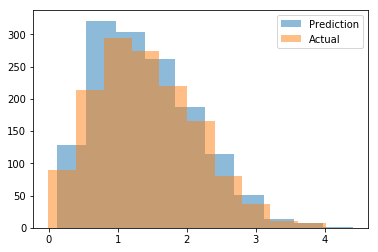

In [595]:
plt.hist(y_hat, alpha=0.5, label='Prediction')
plt.hist(y_test, alpha=0.5, label='Actual')
plt.legend(loc='upper right')
plt.show()

simple linear regression and ridge regression are useful to evaluate player PERFORMANCE rather improvement given a players statistics over the current NHL year. Poor results were found when trying to predict player improvement with regression models, better results are found below.

## SVM - Classifying player improvement

In [536]:
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [838]:
x_train = np.asanyarray(pplayer_data[pplayer_data['Season']<2016][X])
x_test = np.asanyarray(pplayer_data[pplayer_data['Season']>=2016][X])
y_train = np.asanyarray(pplayer_data[pplayer_data['Season']<2016][Y])
y_test = np.asanyarray(pplayer_data[pplayer_data['Season']>=2016][Y])

In [860]:
x_train = np.asanyarray(scaled_data[scaled_data['Season']<2015][X])
x_test = np.asanyarray(scaled_data[scaled_data['Season']>=2015][X])
y_train = np.asanyarray(scaled_data[scaled_data['Season']<2015][Y])
y_test = np.asanyarray(scaled_data[scaled_data['Season']>=2015][Y])

In [701]:
#Create labels for target variable. If the player improved label as +1 else -1.
avg = np.mean(pplayer_data['Performance'])
minn = min(pplayer_data['Performance'])
maxx = max(pplayer_data['Performance'])
for i,j in enumerate(pplayer_data['Performance']):
    if j > 0:
        pplayer_data.loc[i, 'Performance'] = 1
    elif j <= 0:
        pplayer_data.loc[i, 'Performance'] = -1 

In [726]:
x = np.asanyarray(pplayer_data[X])
y = np.asanyarray(pplayer_data[Y])

In [861]:
x = np.asanyarray(scaled_data[X])
y = np.asanyarray(scaled_data[Y])

In [864]:
svm_mdl = svm.SVC(kernel='linear', C=1, random_state=42) # create SVM model

In [865]:
svm_mdl.fit(x_train, y_train.flatten()) # fit SVM model

SVC(C=1, kernel='linear', random_state=42)

In [866]:
y_hat = svm_mdl.predict(x_test) # predict with svm model

In [862]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_mdl, x, y.flatten(), cv=5) # evaulate with cross validation

In [863]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.01


In [867]:
print("Avg F1-score: %.4f" % f1_score(y_test, y_hat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, y_hat, average='weighted'))

Avg F1-score: 0.5893
Jaccard score: 0.4194


[[357 181]
 [231 240]]


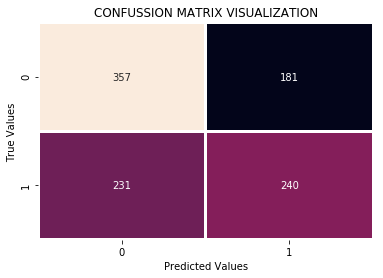

In [869]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_hat,labels=[0,1]))

sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,lw =2,cbar=False,fmt='g')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

## Random Forest Classifier

In [744]:
from sklearn.ensemble import RandomForestClassifier

In [871]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train.flatten())
# predictions
rfc_predict = rfc.predict(x_test)

In [870]:
rfc_cv_score = cross_val_score(rfc, x, y.flatten(), cv=10, scoring='roc_auc')
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

Mean AUC Score - Random Forest:  0.5883669517684347


[[344 194]
 [269 202]]


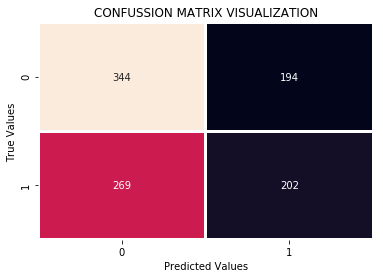

In [872]:
print(confusion_matrix(y_test,rfc_predict,labels=[0,1]))

sns.heatmap(confusion_matrix(y_test,rfc_predict),annot=True,lw =2,cbar=False,fmt='g')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [873]:
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.56      0.64      0.60       538
         1.0       0.51      0.43      0.47       471

    accuracy                           0.54      1009
   macro avg       0.54      0.53      0.53      1009
weighted avg       0.54      0.54      0.54      1009





## Logistic Regression Classifier

In [750]:
from sklearn.linear_model import LogisticRegression

In [874]:
lr = LogisticRegression(penalty='l2', C=1, class_weight='balanced', warm_start=True)
lr.fit(x_train, y_train.flatten())
y_hat = lr.predict(x_test)

In [875]:
scores = cross_val_score(lr, x, y.flatten(), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.00


[[264 274]
 [163 308]]


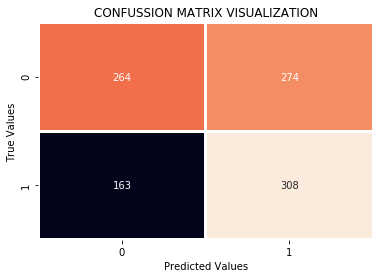

In [876]:
print(confusion_matrix(y_test,y_hat,labels=[0,1]))

sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,lw =2,cbar=False,fmt='g')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [877]:
print("=== Classification Report ===")
print(classification_report(y_test, y_hat))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

         0.0       0.62      0.49      0.55       538
         1.0       0.53      0.65      0.58       471

    accuracy                           0.57      1009
   macro avg       0.57      0.57      0.57      1009
weighted avg       0.58      0.57      0.56      1009





## Gradient Boost Classifier

In [878]:
 from sklearn.ensemble import GradientBoostingClassifier

In [879]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train.flatten())
y_hat = gb.predict(x_test)

In [880]:
scores = cross_val_score(gb, x, y.flatten(), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.59 accuracy with a standard deviation of 0.02


[[394 144]
 [281 190]]


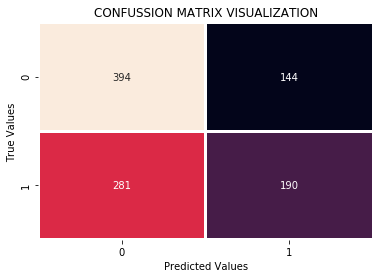

In [881]:
print(confusion_matrix(y_test,y_hat,labels=[0,1]))

sns.heatmap(confusion_matrix(y_test,y_hat),annot=True,lw =2,cbar=False,fmt='g')
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

Gradient boost classifier best classifies players that have not improved while logistic regression using the weighted balanced method better classifies players that have improved. Although, accuracy is quite low, ~60%. I suspect that I might need more data or more individual player statistics to enhance decision boundaries.